<div class="alert alert-block alert-info">
    
# <font color=red>TELCO CUSTOMER CHURN PREDICTION</font>

### USING LOGISTIC REGRESSION ANALYSIS

### Table of Contents

* [Import Libraries](#section_1)
* [Load the Dataset into Dataframe](#section_2)
* [Scrubbing the Data](#section_3)
* [Performing Feature Selection](#section_4)
* [Model Building](#section_5)
* [PreProcessing the Dataset](#section_6)
* [Fine-Tunning the Model](#section_7)
* [Build the Model](#section_5)
* [Evaluating the Model](#section_6)

<div class="alert alert-block alert-info">
   
## SECTION 1: IMPORT THE LIBRARIES

<a id="section_1"></a>

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
   
## SECTION 2: Load The DataSet to DataFrame

<a id="section_2"></a>

#### Read the Data to Pandas DataFrame named Data

In [42]:
data = pd.read_csv('Telco_Customer_Churn.csv')

In [43]:
# Read first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
# Check the Number of Rows and Columns
data.shape

(7043, 21)

> The dataset contains 7043 rows and 21 Columns

<div class="alert alert-block alert-info">
   
## SECTION 3: Scrubbing the Data

<a id="section_3"></a>

> Missing value imputation, data type conversion, standardization and renaming the column

In [44]:
# Rename customerID, gender and tenure column name.
data = data.rename(columns={'customerID' : 'CustomerID' , 'gender': 'Gender', 'tenure':'Tenure'})

In [46]:
# Replace missing Data
missing_data = list(data[data['TotalCharges'] == " "].index)
print('Missing Data from TotalCharges Indexes :', missing_data , '\nTotal rows :', len(missing_data))
missing_data = list(data[data['TotalCharges'] == " "].index)

Missing Data from TotalCharges Indexes : [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows : 11


In [47]:
# Convert TotalCharges to Numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [48]:
# Checking missing values
data.isnull().any()

CustomerID          False
Gender              False
SeniorCitizen       False
Partner             False
Dependents          False
Tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [49]:
# Replacing the missing data with 0
for row in missing_data:
    data['TotalCharges'][row] = 0

> Column TotalCharges has missing values

In [50]:
# Explore the data
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [51]:
# Check the Categorical features
column_ex = ['MonthlyCharges', 'CustomerID', 'Tenure', 'TotalCharges']
for name in data.columns:
    if name not in column_ex:
        print('{} is : '.format(name), data[name].unique())

Gender is :  ['Female' 'Male']
SeniorCitizen is :  [0 1]
Partner is :  ['Yes' 'No']
Dependents is :  ['No' 'Yes']
PhoneService is :  ['No' 'Yes']
MultipleLines is :  ['No phone service' 'No' 'Yes']
InternetService is :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity is :  ['No' 'Yes' 'No internet service']
OnlineBackup is :  ['Yes' 'No' 'No internet service']
DeviceProtection is :  ['No' 'Yes' 'No internet service']
TechSupport is :  ['No' 'Yes' 'No internet service']
StreamingTV is :  ['No' 'Yes' 'No internet service']
StreamingMovies is :  ['No' 'Yes' 'No internet service']
Contract is :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling is :  ['Yes' 'No']
PaymentMethod is :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn is :  ['No' 'Yes']


> It seems that most of the features are Categorical features

In [52]:
data['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [53]:
# Drop the customerID column
data.drop(labels=['CustomerID'], axis = 1, inplace=True)

In [54]:
# Change the Data types to Categorical
# Print the unique entries in the features
column_ex = ['MonthlyCharges', 'CustomerID', 'Tenure', 'TotalCharges']
for name in data.columns:
    if name not in column_ex:
        data[name] = data[name].astype('category').cat.codes

In [55]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [56]:
data.shape[1]
#data.drop(labels=['CustomerID'], axis = 1, inplace = True)

20

In [57]:
from pivottablejs import pivot_ui
pivot_ui(data)

<div class="alert alert-block alert-info">
   
## SECTION 4: Performing Feature Selection

<a id="section_4"></a>

We will be performing feature selection using a tree-based selection method that performs best on classification tasks

In [58]:
# Import RandomForestClassifier and train_test_split from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [59]:
# Split the data into training and testing sets
target = 'Churn'
X = data.drop('Churn', axis=1)
y = data[target]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=123, stratify=y)

In [61]:
# Fit the model using Random Forest classifier for feature Selection
forest = RandomForestClassifier(n_estimators=500, random_state = 1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [62]:
# Call the Random Forest Feature_importances_ attribute to find important features
# and store it in variable named importances
importances = forest.feature_importances_

In [63]:
# Create variable features to store all the columns except the target Churn
features = data.drop(['Churn'], axis = 1).columns
indices = np.argsort(importances)[::-1]

<function matplotlib.pyplot.show(*args, **kw)>

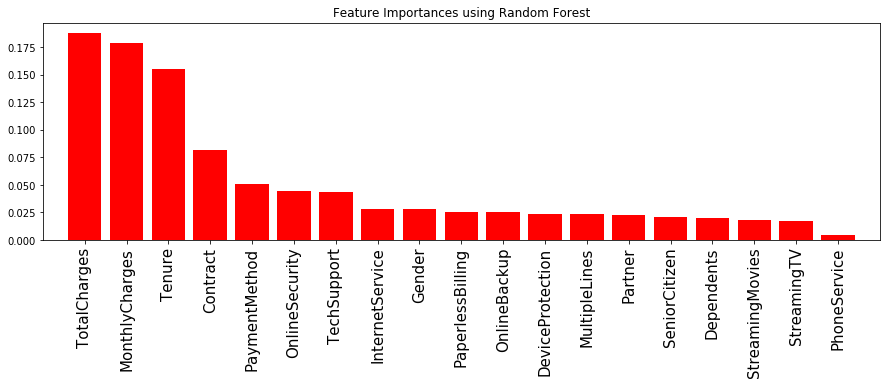

In [64]:
plt.figure(figsize=(15,4))
plt.title("Feature Importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices],
          rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show

From the figure above, we are going to pick the first seven most important features from the tree-based feature selection: **TotalCharges, MonthlyCharges, Tenure, Contract, PaymentMethod, OnlineSecurity, TechSupport**

<div class="alert alert-block alert-info">
   
## SECTION 5: Model Building

<a id="section_5"></a>

We are going to try out different kind of algorithm to build the prediction model. We will be using **Logistic Regression** as the base model 

### Using the statsmodel
****

In [4]:
# Import statsmodel
import statsmodels.api as sm

In [66]:
top7_features = ['TotalCharges', 'MonthlyCharges', 'Tenure', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport']

In [67]:
logReg = sm.Logit(y_train.astype(float), X_train[top7_features].astype(float))
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.428549
         Iterations 8


In [68]:
# Obtain the Summary and the Parameters
logistic_regression.summary
logistic_regression.params

TotalCharges      0.000533
MonthlyCharges    0.012167
Tenure           -0.075234
Contract         -0.838934
PaymentMethod    -0.082619
OnlineSecurity   -0.384223
TechSupport      -0.372742
dtype: float64

In [70]:
# Create a function to compute the coefficient
coef = logistic_regression.params
def pred(coef, TotalCharges, MonthlyCharges, Tenure, Contract, PaymentMethod, OnlineSecurity, TechSupport):
    return coef[0]*TotalCharges + coef[1]*MonthlyCharges + coef[2]*Tenure + coef[3]*Contract 
    + coef[4]*PaymentMethod + coef[5]*OnlineSecurity + coef[6]*TechSupport

In [71]:
# Example: Calculate the chance of a customer churning by inputing the following values
# TotalCharges: 2000, MonthlyCharges: 56.32, Tenure: 34, Contract: 2, PaymentMethod: 2, OnlineSecurity: 1, TechSupport: 2

In [72]:
import numpy as np
output = pred(coef, 2000, 56.32, 34, 2, 2, 1, 2)
probability = np.exp(output) / (1 + np.exp(output))

In [73]:
probability

0.07701400670535927

The probability is approximately 0.077, which implies that a customer with a total charges of 2000 dollars, a monthly charge of 56.32 dollars with a tenure of 34, contract term of 2 years, pays by mailing check and has no online security with no tech support has a **7.7 percent chance of churning** 

### Using Scikit-Learn's LogisticRegression model
------------------

We will implement scikit-learn's **LogisticRegression** to build our classifier and predict on the test datato find out the accuracy of our model

In [74]:
# Import scikitlearn packages
from sklearn.linear_model import LogisticRegression

In [75]:
# Fit the model
clf = LogisticRegression(random_state = 0, solver = 'lbfgs',).fit(X_train[top7_features], y_train)

In [76]:
# Call Predict and predict_proba frunctions on the test data
clf.predict(X_test[top7_features])
clf.predict_proba(X_train[top7_features])

array([[0.99747055, 0.00252945],
       [0.99420034, 0.00579966],
       [0.92097098, 0.07902902],
       ...,
       [0.50221231, 0.49778769],
       [0.87461751, 0.12538249],
       [0.48769472, 0.51230528]])

In [77]:
# Calculate the accuracy of the model
clf.score(X_test[top7_features], y_test)

0.7899716177861873

In [78]:
coef2 = clf.coef_

In [79]:
list(list(coef2))

[array([ 5.14007541e-04,  1.67935556e-02, -7.61043529e-02, -7.31973415e-01,
        -8.96618719e-02, -4.39467203e-01, -4.36974102e-01])]

In [80]:
coef2

array([[ 5.14007541e-04,  1.67935556e-02, -7.61043529e-02,
        -7.31973415e-01, -8.96618719e-02, -4.39467203e-01,
        -4.36974102e-01]])

### Using Support Vector Machine (SVM)

In [81]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [82]:
# Fit a linear SVM with c = 1
clf_svm = svm.SVC(kernel='linear', C = 1)
clf_svm.fit(X_train[top7_features], y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [83]:
# Predict on the test data
clf_svm.predict(X_test[top7_features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [84]:
# Calculate the accuracy score
clf_svm.score(X_test[top7_features], y_test)

0.7899716177861873

### Implementing a Decision Tree Algorithm over the Dataset

In [85]:
import graphviz
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [86]:
# Decision tree classifier
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train[top7_features], y_train)

In [ ]:
# Plot the Decision tree using graph
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,
               filled=True, rounded=True,
               class_names=['Churn', 'Not_Churn'], max_depth = 3,
               special_characters = True, feature_names = X[top7_features].columns.values)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [88]:
#Calculate the accuracy score
clf_tree.score(X_test[top7_features], y_test)

0.7587511825922422

The decision tree classifier scores an accuracy of around **75.78 percent**. which implies that the classifier is able to predict **75.78 percent** of the test data correctly

### Implementing a Random Forest Model over the Dataset

In [89]:
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Fit the classifier to the training data
clf_random = RandomForestClassifier(n_estimators = 20, max_depth = None, min_samples_split = 7, random_state = 0)
clf_random.fit(X_train[top7_features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
# Predict on the test data
clf_random.predict(X_test[top7_features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [92]:
# Calculate the classifier accuracy score
clf_random.score(X_test[top7_features], y_test)

0.7852412488174078

The classifier score an accuracy of 78.52 percent which implies that the classifier was able to predict 78.52 percent of the test data correctly

**Create a table to compare the accuracy of all the different algoritm that we have applied:**

In [93]:
Algorithm = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
Accuracy = [0.790, 0.781, 0.758, 0.785]

In [94]:
Comparison_Table = pd.DataFrame({'Algorithm':Algorithm, 'Accuracy':Accuracy})

In [95]:
Comparison_Table

,Algorithm,Accuracy
0,Logistic Regression,0.790
1,SVM,0.781
2,Decision Tree,0.758
3,Random Forest,0.785


<div class="alert alert-block alert-info">
   
## SECTION 6: PreProcessing the Dataset

<a id="section_6"></a>

We are going to preprocess the dataset and see if this can improve the accuracy score for the different algorithm we have used.
We are going to perform **Standardization, Scaling and Normalization**

In [96]:
from sklearn import preprocessing as pp

### Using Standardized Dataset

In [97]:
# Fit the StandardScaler function on the X_train data
scaler = pp.StandardScaler().fit(X_train[top7_features])

In [98]:
scaler.mean_

array([2.27314222e+03, 6.47379051e+01, 3.23653525e+01, 6.87938523e-01,
       1.56531908e+00, 7.86835951e-01, 7.98864016e-01])

In [99]:
scaler.scale_

array([2.25791242e+03, 3.00483316e+01, 2.45051594e+01, 8.32142176e-01,
       1.07261887e+00, 8.59101804e-01, 8.61997179e-01])

> This is the scaled value of the top seven important columns

In [100]:
# Apply transform function to the X_train and X_test data
X_train_scaler = scaler.transform(X_train[top7_features])
X_test_scaler = scaler.transform(X_test[top7_features])

In [101]:
# Check the output
X_train_scaler

array([[-0.37614046, -1.34409809,  1.04609185, ..., -0.52704562,
         0.24812432,  0.23333717],
       [ 0.3424658 , -0.23921145,  0.92366865, ..., -1.45934323,
         1.41213072,  1.39343378],
       [-0.86426834, -1.32912222, -0.7494484 , ..., -0.52704562,
         0.24812432,  0.23333717],
       ...,
       [-0.91039502,  0.51124618, -1.19833346, ..., -0.52704562,
        -0.91588208,  1.39343378],
       [-0.47917812, -0.18429992, -0.504602  , ..., -1.45934323,
         1.41213072,  1.39343378],
       [ 1.82828516,  1.36986291,  1.12770732, ...,  0.40525198,
        -0.91588208, -0.92675943]])

In [102]:
# Convert to dataframe
X_train_scaler = pd.DataFrame(X_train_scaler, columns = X_train[top7_features].columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns = X_test[top7_features].columns)

In [105]:
# Fit the model using Random Forest
clf_random.fit(X_train_scaler, y_train)

# Get the random forest accuracy score
clf_random.score(X_test_scaler, y_test)

0.7861873226111636

In [106]:
# Fit the model using Decision Tree
clf_tree = clf_tree.fit(X_train_scaler, y_train)

# Get the Decision Tree accuracy score
clf_tree.score(X_test_scaler, y_test)

0.7568590350047304

In [107]:
# Fit using Logistic Regression
clf = LogisticRegression(random_state = 0, solver = 'lbfgs',).fit(X_train_scaler, y_train)

# Call Predict and predict_proba frunctions on the test data
clf.predict(X_test_scaler)
clf.predict_proba(X_train_scaler)

array([[0.99531981, 0.00468019],
       [0.99146838, 0.00853162],
       [0.92611596, 0.07388404],
       ...,
       [0.48818887, 0.51181113],
       [0.8516046 , 0.1483954 ],
       [0.51799651, 0.48200349]])

In [108]:
# Calculate the accuracy of the model
clf.score(X_test_scaler, y_test)

0.7861873226111636

### Performing Normalization on Dataset

In [110]:
from sklearn import preprocessing

In [111]:
# Fit the Normalizer() on the training dataset
normalize = preprocessing.Normalizer().fit(X_train[top7_features])

In [112]:
# Check the normalize function if it is L2 or L1 Norm
normalize

Normalizer(copy=True, norm='l2')

>This is an L2 Normalization

In [113]:
# Transform the Dataset
X_train_normalize = normalize.transform(X_train[top7_features])
X_test_normalize = normalize.transform(X_test[top7_features])

In [114]:
# Convert to DataFrame
X_train_normalize = pd.DataFrame(X_train_normalize, columns = X_train[top7_features].columns)
X_test_normalize = pd.DataFrame(X_test_normalize, columns = X_train[top7_features].columns)

In [115]:
# Fit the model using Random Forest
clf_random.fit(X_train_normalize, y_train)

# Get the random forest accuracy score
clf_random.score(X_test_normalize, y_test)

0.7871333964049196

In [116]:
# Fit the model using Decision Tree
clf_tree = clf_tree.fit(X_train_normalize, y_train)

# Get the Decision Tree accuracy score
clf_tree.score(X_test_normalize, y_test)

0.7265846736045412

In [117]:
# Fit using Logistic Regression
clf = LogisticRegression(random_state = 0, solver = 'lbfgs',).fit(X_train_normalize, y_train)

# Call Predict and predict_proba frunctions on the test data
clf.predict(X_test_scaler)
clf.predict_proba(X_train_scaler)

# Calculate the accuracy of the model
clf.score(X_test_scaler, y_test)

0.7105014191106906

## Implementing Stratified k-fold

Because of Class Imbalance, we are going to use a **Staratified K Fold**

We will fit the Staratified K-Fold of the Scikit-Learn on the Dataset

In [118]:
# import StratifiedKFold from sklearn
from sklearn.model_selection import StratifiedKFold

In [119]:
# Fit the classifier on training and testing dataset
skf = StratifiedKFold(n_splits=10, random_state = 1).split(X_train[top7_features].values, y_train.values)

calculate the k-cross fold validation score using **for loop**:

In [120]:
# calculate the k-cross fold validation score using for loop:
results = []
for i, (train, test) in enumerate(skf):
    clf.fit(X_train[top7_features].values[train], y_train.values[train])
    
fit_result = clf.score(X_train[top7_features].values[test], y_train.values[test])
results.append(fit_result)
print('K-Fold: %2d, Class Ratio: %s, Accuracy: %.4f' % (i,np.bincount(y_train.values[train]),fit_result))
    

K-Fold:  9, Class Ratio: [3958 1431], Accuracy: 0.8107


In [121]:
print('accuracy for CV is:%.3f' % np.mean(results))

accuracy for CV is:0.811


calculate the k-cross fold validation score using **cross_val_score** from sklearn:

In [122]:
from sklearn.model_selection import cross_val_score

# Fit the classifier and print accuracy
results_cross_val_score = cross_val_score(estimator=clf, X=X_train[top7_features].values, y=y_train.values, cv=10, n_jobs=1)
print('accuracy for CV is:%.3f' % np.mean(results_cross_val_score))

accuracy for CV is:0.790


In [123]:
# Fit the classifier on training and testing dataset
skf = StratifiedKFold(n_splits=10, random_state = 1).split(X_train_normalize.values, y_train.values)

In [124]:
# calculate the k-cross fold validation score:
results = []
for i, (train, test) in enumerate(skf):
    clf.fit(X_train_normalize.values[train], y_train.values[train])
    
fit_result = clf.score(X_train_normalize.values[test], y_train.values[test])
results.append(fit_result)
print('K-Fold: %2d, Class Ratio: %s, Accuracy: %.4f' % (i,np.bincount(y_train.values[train]),fit_result))

K-Fold:  9, Class Ratio: [3958 1431], Accuracy: 0.7789


In [125]:
# Fit the classifier on training and testing dataset
skf = StratifiedKFold(n_splits=10, random_state = 1).split(X_train_scaler.values, y_train.values)

# calculate the k-cross fold validation score:
results = []
for i, (train, test) in enumerate(skf):
    clf.fit(X_train_scaler.values[train], y_train.values[train])
    
fit_result = clf.score(X_train_scaler.values[test], y_train.values[test])
results.append(fit_result)
print('K-Fold: %2d, Class Ratio: %s, Accuracy: %.4f' % (i,np.bincount(y_train.values[train]),fit_result))

K-Fold:  9, Class Ratio: [3958 1431], Accuracy: 0.8074


In [126]:
print('accuracy for CV is:%.3f' % np.mean(results))

accuracy for CV is:0.807


<div class="alert alert-block alert-info">
   
## SECTION 7: Fine-Tunning the Model

<a id="section_7"></a>


We will implement a grid search to find out the best parameters for an **SVM** on the dataset

In [127]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [128]:
# specify the parameter for the grid search
parameters = [{'kernel':['linear'], 'C':[0.1, 1, 10]}, {'kernel':['rbf'], 'gamma':[0.5, 1, 2], 'C':[0.1, 1, 10]}]

In [ ]:
# Fit the grid search
clf = GridSearchCV(svm.SVC(), parameters, cv = StratifiedKFold(n_splits = 10))
clf.fit(X_train[top7_features], y_train)

In [ ]:
# Print the best score and best parameter
print('Best score train:', clf.best_score_)
print('Best parameters train: ', clf.best_params_)

## Comparison of the Models

In [132]:
# Import required Libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [133]:
# Fit the random Forest
clf_random_grid = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=10, random_state=0)
clf_random_grid.fit(X_train[top7_features], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [134]:
# Predict on the test data
y_pred = clf_random_grid.predict(X_test[top7_features])

In [135]:
# Fit the classification report
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.84      0.91      0.87       777
       Churn       0.67      0.51      0.58       280

    accuracy                           0.80      1057
   macro avg       0.75      0.71      0.73      1057
weighted avg       0.79      0.80      0.79      1057



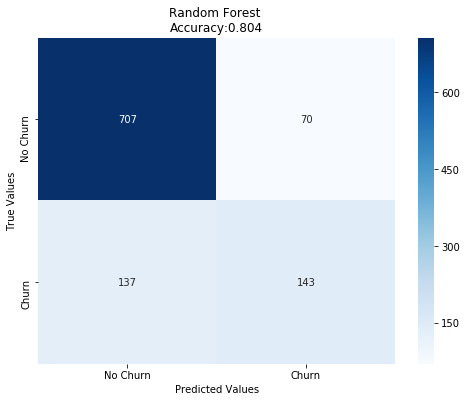

In [136]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                    index = target_names,
                    columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [137]:
# Import the library for AUC and ROC curve
from sklearn.metrics import roc_curve, auc

In [ ]:
# Create dictionary of the different classifiers created
models = [
    {
        'label':'Logistic Regression',
        'model': clf,
    },
    {
        'label': 'Decision Tree',
        'model': clf_tree,
    },
    {
        'label': 'SVM',
        'model': clf_svm,
    },
    {
        'label':'Random Forest Grid Search',
        'model': clf_random,
    }
    ]

In [ ]:
# Plot the ROC Curve
for m in models:
    model = m['model']
    model.fit(X_train[top7_features], y_train)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (m['label'], roc_auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1 - Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
plt.show()